In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [149]:
df = pd.read_csv('E:/Data Scientist/video Learning Situation on New Delhi in Covid-19 Era _ Kaggle_files/COVID-19 Survey Student Responses.csv')
df.head()

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling


In [150]:
df.shape # dimensi data

(1182, 19)

In [151]:
df.info() # info struktur data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 19 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   ID                                                                                  1182 non-null   object 
 1   Region of residence                                                                 1182 non-null   object 
 2   Age of Subject                                                                      1182 non-null   int64  
 3   Time spent on Online Class                                                          1182 non-null   float64
 4   Rating of Online Class experience                                                   1158 non-null   object 
 5   Medium for online class                                                             1131 non-null

In [152]:
# Handling Missing Values
df['Rating of Online Class experience'] = df['Rating of Online Class experience'].fillna(method='bfill')
df['Medium for online class'] = df['Medium for online class'].fillna(method='bfill')
df['Time spent on TV'] = df['Time spent on TV'].replace(['n','N','No tv',' '], 0)
df['Time spent on TV'] = df['Time spent on TV'].astype('float64')


In [153]:
# mempersiapkan data numerik dan kategorik
numeric = [
    'Age of Subject', 'Time spent on Online Class', 'Time spent on self study', 'Time spent on fitness', 'Time spent on sleep', 
    'Time spent on social media', 'Time spent on TV', 'Number of meals per day']

categorical = [
    'Region of residence', 'Rating of Online Class experience', 'Medium for online class', 'Prefered social media platform', 
    'Change in your weight', 'Health issue during lockdown', 'Stress busters', 'Time utilized', 
    'Do you find yourself more connected with your family, close friends , relatives  ?', 'What you miss the most']

In [154]:
ror = df['Region of residence'].value_counts()
ror.head()

Delhi-NCR            721
Outside Delhi-NCR    461
Name: Region of residence, dtype: int64

In [155]:
conditions_1 = [
    df['Region of residence'] == 'Delhi-NCR',
    df['Region of residence'] == 'Outside Delhi-NCR']

values_1 = [0, 1]

df['Code Region of residence'] = np.select(conditions_1, values_1)

df['Code Region of residence'].value_counts()

0    721
1    461
Name: Code Region of residence, dtype: int64

In [156]:
# Missing Values
df.isnull().sum()

ID                                                                                    0
Region of residence                                                                   0
Age of Subject                                                                        0
Time spent on Online Class                                                            0
Rating of Online Class experience                                                     0
Medium for online class                                                               0
Time spent on self study                                                              0
Time spent on fitness                                                                 0
Time spent on sleep                                                                   0
Time spent on social media                                                            0
Prefered social media platform                                                        0
Time spent on TV                

([<matplotlib.patches.Wedge at 0x1cf8b74cd60>,
 [Text(0.48553399438264355, 0.9870444469722907, 'Very Poor'),
  Text(-1.089510789478021, -0.1515461633000962, 'Average'),
  Text(0.27197273093621493, -1.0658474720273523, 'Good'),
  Text(1.0008158771423292, -0.4564729784552754, 'Excellent'),
  Text(1.0962683079871118, -0.09053064068631574, 'Poor')],
 [Text(0.2648367242087146, 0.5383878801667039, '35.45%'),
  Text(-0.5942786124425569, -0.08266154361823429, '33.50%'),
  Text(0.1483487623288445, -0.5813713483785558, '20.05%'),
  Text(0.5458995693503613, -0.24898526097560475, '8.38%'),
  Text(0.5979645316293337, -0.049380349465263124, '2.62%')])

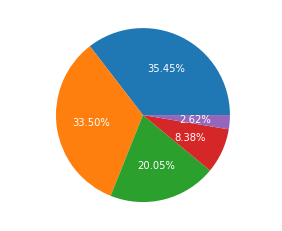

In [157]:
# Check Variabel Target (Y)

target_count = df['Rating of Online Class experience'].value_counts()
labels = ['Very Poor', 'Average', 'Good', 'Excellent', 'Poor']

plt.pie(x=target_count, labels=labels, autopct='%.2f%%', textprops={'color':'w'})

In [158]:
target_count

Very poor    419
Average      396
Good         237
Excellent     99
Poor          31
Name: Rating of Online Class experience, dtype: int64

In [159]:
# Membuat variabel recode dari Variabel Target (Y)

def my_recode_Y(rating):
    if rating == 'Very poor':
        return 1
    elif rating == 'Poor':
        return 2
    elif rating == 'Average':
        return 3
    elif rating == 'Good':
        return 4
    else:
        return 5

df['Code Rating of Online Class experience'] = df['Rating of Online Class experience'].apply(my_recode_Y)

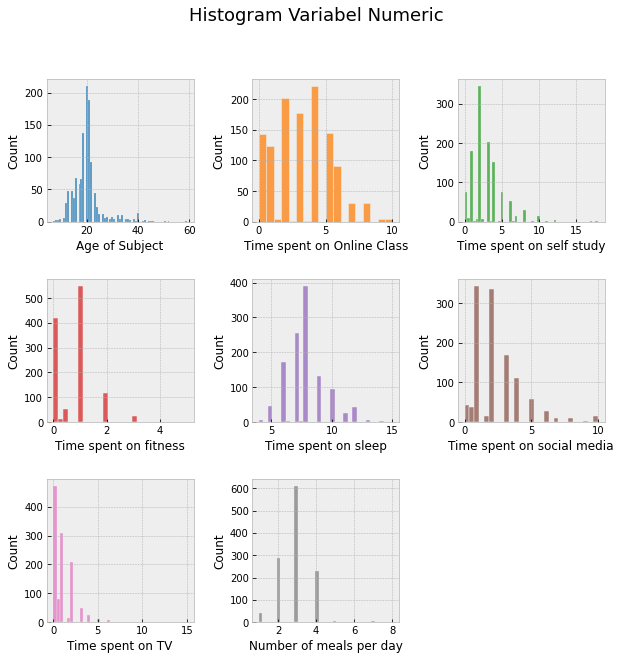

In [160]:
# distribusi variabel numerik

colors = sns.color_palette('tab10')
with plt.style.context('bmh'):
    plt.figure(figsize=(10, 10))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    for i, (col,name) in enumerate (zip(colors, numeric)):
        plt.subplot(3, 3, i+1)
        sns.histplot(data=df, x=name, color=col)
    plt.suptitle("Histogram Variabel Numeric", fontsize=18)
    

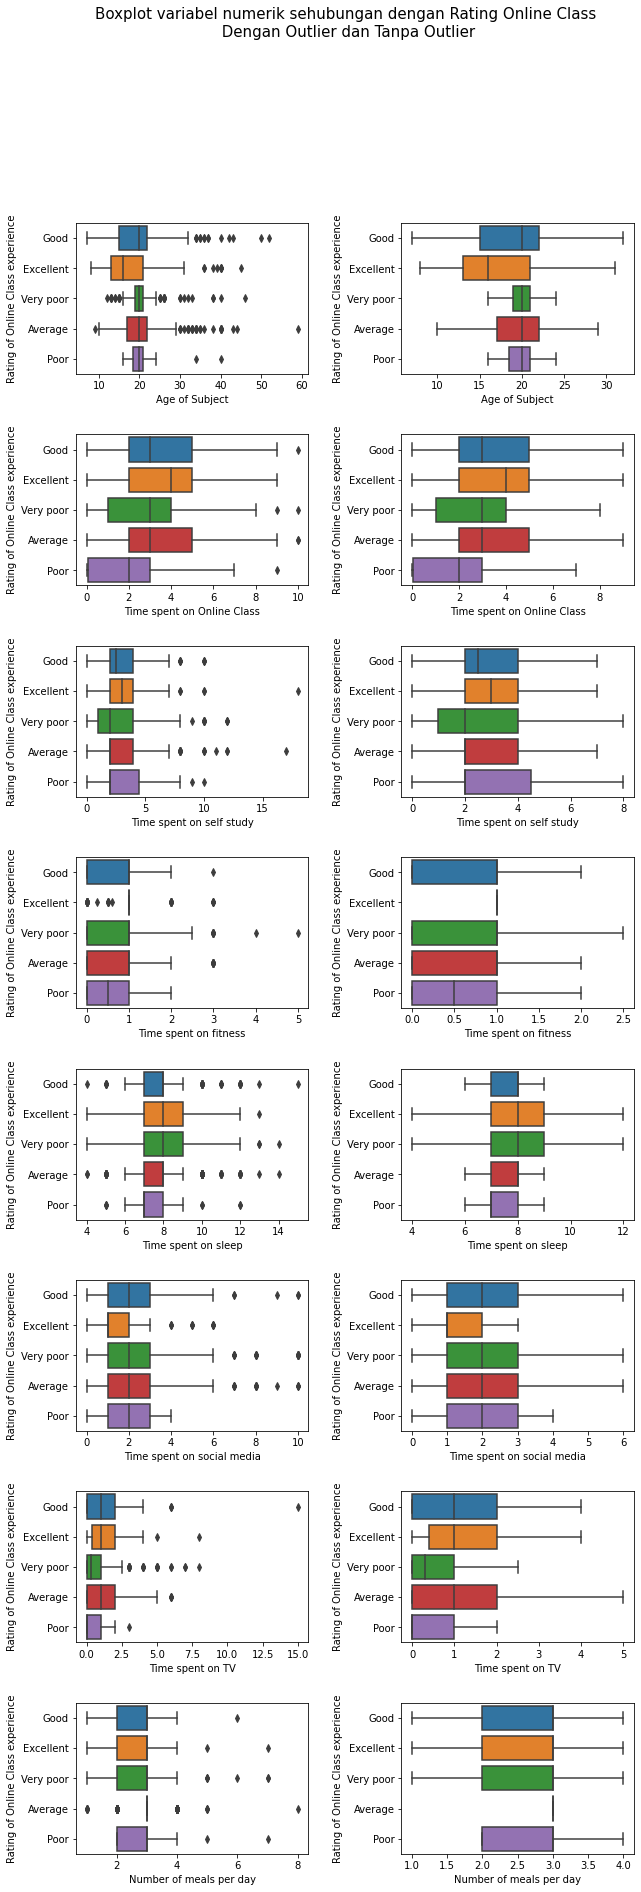

In [161]:
fig, axes = plt.subplots(8, 2, figsize=(10, 30))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
axes = axes.ravel()

for i, name, col in zip(np.arange(0, 16, 2,), numeric, colors):
    sns.boxplot(data=df, x=name, ax=axes[i], 
    y='Rating of Online Class experience',
    orient='h', showfliers=True)
    sns.boxplot(data=df, x=name, ax=axes[i+1], 
    y='Rating of Online Class experience',
    orient='h', showfliers=False)

plt.suptitle('Boxplot variabel numerik sehubungan dengan Rating Online Class\n Dengan Outlier dan Tanpa Outlier', fontsize=15)
plt.show()


In [162]:
# Membuat Recode Variabel Kategorik menjadi Dummy

df['Code Region of residence'] = np.where(df['Region of residence'] == 'Delhi-NCR', 0, 1) # 1

medium = [
    df['Medium for online class'] == 'Laptop/Desktop',
    df['Medium for online class'] == 'Smartphone',
    df['Medium for online class'] == 'Tablet',
    df['Medium for online class'] == 'Any Gadget',
    df['Medium for online class'] == 'Smartphone or Laptop/Desktop']

values_1 = [0, 1, 2, 3, 4]

df['Code Medium for online class'] = np.select(medium, values_1) # 2

def my_recode(sosmed):
    if sosmed == 'Instagram':
        return 0
    elif sosmed == 'Whatsapp':
        return 1
    elif sosmed == 'Youtube':
        return 2
    else:
        return 3

df['Code Prefered social media platform'] = df['Prefered social media platform'].apply(my_recode) # 3

weight = [
    df['Change in your weight'] == 'Remain Constant',
    df['Change in your weight'] == 'Increased',
    df['Change in your weight'] == 'Decreased',]

values_2 = [0, 1, 2]

df['Code Change in your weight'] = np.select(weight, values_2) # 4

df['Code Health issue during lockdown'] = np.where(df['Health issue during lockdown'] == 'NO', 0, 1) # 5

def my_recode_1(stress):
    if stress == 'Listening to music':
        return 0
    elif stress == 'Online gaming':
        return 1
    elif stress == 'Watching web series':
        return 2
    elif stress == 'Reading books':
        return 3
    elif stress == 'Scrolling through social media':
        return 4   
    elif stress == 'Sleeping':
        return 5     
    else:
        return 6

df['Code Stress busters'] = df['Stress busters'].apply(my_recode_1) # 6

df['Code Time utilized'] = np.where(df['Time utilized'] == 'NO', 0, 1) # 7

df['Code Do you find yourself more connected with your family, close friends , relatives  ?'] = np.where(
    df['Do you find yourself more connected with your family, close friends , relatives  ?'] == 'NO', 0, 1) # 8

def my_recode_2(miss):
    if miss == 'School/college':
        return 0
    elif miss == 'Friends , relatives':
        return 1
    elif miss == 'Travelling':
        return 2
    elif miss == 'Roaming around freely':
        return 3
    elif miss == 'Eating outside':
        return 4
    elif miss == 'Colleagues':
        return 5
    else:
        return 6

df['Code What you miss the most'] = df['What you miss the most'].apply(my_recode_2) # 9

In [163]:
# Membuat data Kumpulan variabel Dummy

categorical_1 = [
    'Code Region of residence', 'Code Medium for online class', 'Code Prefered social media platform', 
    'Code Change in your weight', 'Code Health issue during lockdown', 'Code Stress busters', 'Code Time utilized', 
    'Code Do you find yourself more connected with your family, close friends , relatives  ?', 'Code What you miss the most']


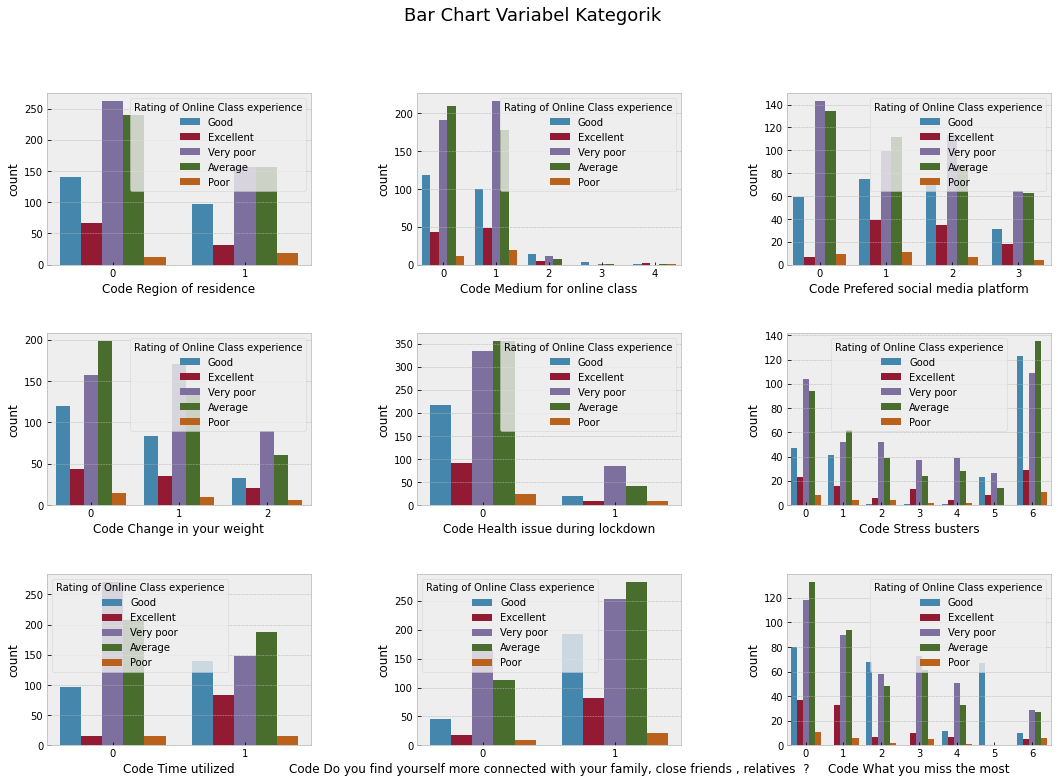

In [164]:
# Distribusi Variabel Kategorik atau Dummy

colors = sns.color_palette('tab10')
with plt.style.context('bmh'):
    plt.figure(figsize=(18,12))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    for i, (col, name) in enumerate(zip(colors, categorical_1)):
        plt.subplot(3, 3, i+1)
        sns.countplot(data=df, x=name, hue='Rating of Online Class experience')

plt.suptitle('Bar Chart Variabel Kategorik', fontsize=18)
plt.show()

In [165]:
from imblearn.over_sampling import SMOTE

# Manipulasi Data

# Menggabungkan variabel numerik dan variabel kategorik after recode
frames = [df[numeric], df[categorical_1]]
result = pd.concat(frames, ignore_index=False, axis=1)

# Memisahkan fitur dan kelas Target (Y) 
X = result
y = df['Code Rating of Online Class experience']
print(X.shape)
print(y.shape)


(1182, 17)
(1182,)


In [1]:
# Perbaikan Ketidakseimbangan Kelas menggunakan SMOTE
# SMOTE adalah teknik oversampling di mana sampel sintetis dihasilkan untuk kelas minoritas
# Contoh kelas minoritas adalah Rating Poor

smote = SMOTE(random_state=2022, n_jobs=-1, k_neighbors=5)
smote.fit(X, y)
X_smote, y_smote = smote.fit_resample(X, y)
print(X_smote.shape)
print(y_smote.shape)

NameError: name 'SMOTE' is not defined

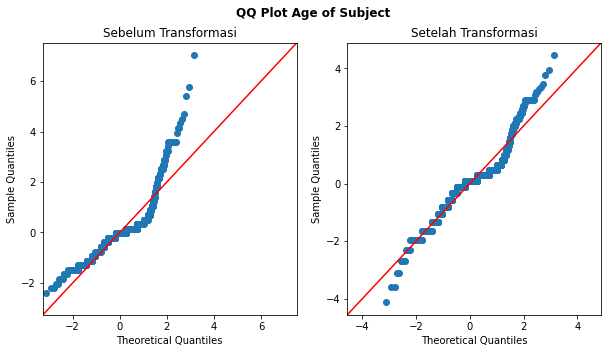

In [167]:
from statsmodels.graphics.gofplots import qqplot

# Transformasi Data
# Beberapa fitur memiliki skewness tinggi maka dilakukan transformasi

# Age of subject
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

qqplot(df['Age of Subject'], fit=True, line='45', ax=ax[0])
ax[0].set_title('Sebelum Transformasi')

qqplot(np.log10(df['Age of Subject']),fit=True, line='45', ax=ax[1])
ax[1].set_title('Setelah Transformasi')

plt.suptitle('QQ Plot Age of Subject', fontweight='bold')
plt.show()


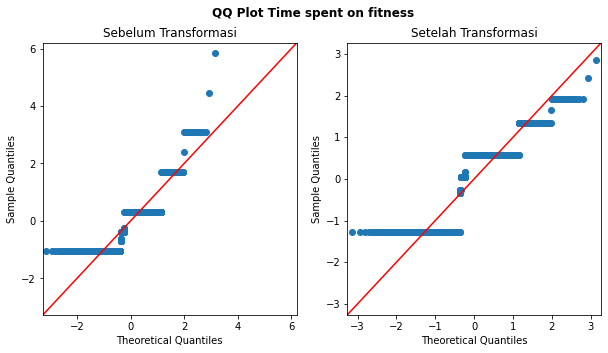

In [168]:
# Time spent on fitness

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

qqplot(df['Time spent on fitness'], fit=True, line='45', ax=ax[0])
ax[0].set_title('Sebelum Transformasi')

qqplot(np.sqrt(df['Time spent on fitness']),fit=True, line='45', ax=ax[1])
ax[1].set_title('Setelah Transformasi')

plt.suptitle('QQ Plot Time spent on fitness', fontweight='bold')
plt.show()

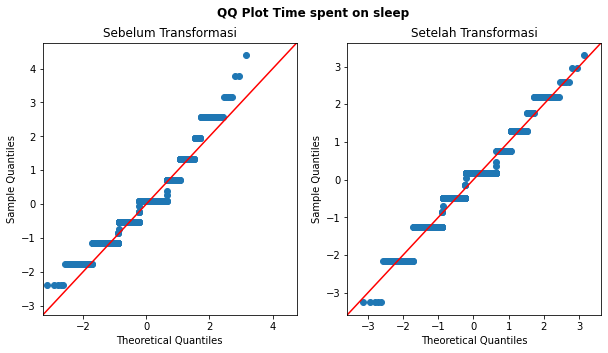

In [169]:
# Time spent on sleep

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

qqplot(df['Time spent on sleep'], fit=True, line='45', ax=ax[0])
ax[0].set_title('Sebelum Transformasi')

qqplot(np.log10(df['Time spent on sleep']),fit=True, line='45', ax=ax[1])
ax[1].set_title('Setelah Transformasi')

plt.suptitle('QQ Plot Time spent on sleep', fontweight='bold')
plt.show()

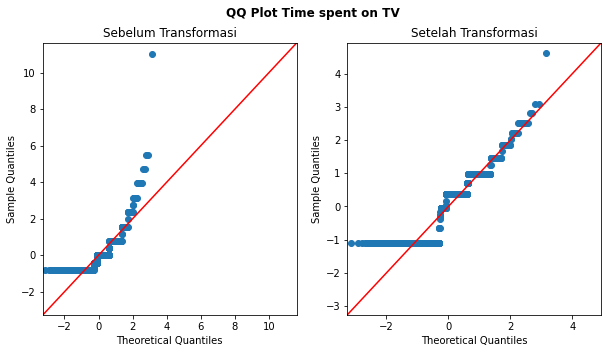

In [170]:
# Time spent on TV

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

qqplot(df['Time spent on TV'], fit=True, line='45', ax=ax[0])
ax[0].set_title('Sebelum Transformasi')

qqplot(np.sqrt(df['Time spent on TV']),fit=True, line='45', ax=ax[1])
ax[1].set_title('Setelah Transformasi')

plt.suptitle('QQ Plot Time spent on TV', fontweight='bold')
plt.show()

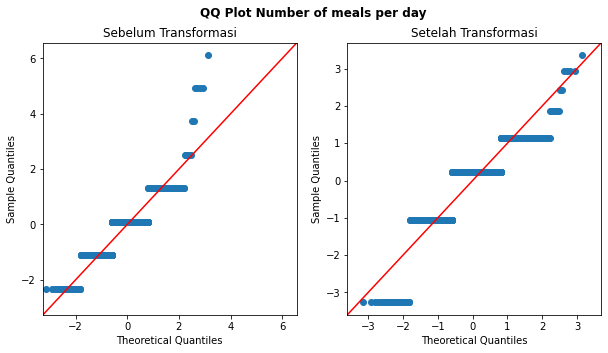

In [171]:
# Number of meals per day

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

qqplot(df['Number of meals per day'], fit=True, line='45', ax=ax[0])
ax[0].set_title('Sebelum Transformasi')

qqplot(np.log10(df['Number of meals per day']),fit=True, line='45', ax=ax[1])
ax[1].set_title('Setelah Transformasi')

plt.suptitle('QQ Plot Number of meals per day', fontweight='bold')
plt.show()

In [172]:
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
# Menstasionerkan varians data pake Power Transformer sklearn
# boxcox dan yeo-johnson, tp yeo-johnson itu upgrade boxcox

pt = PowerTransformer(method='yeo-johnson')
X_pt = pt.fit_transform(X_smote)
X_pt

array([[ 0.4243359 , -0.43805932,  0.65392184, ...,  1.02269176,
         0.72286172, -1.15360581],
       [ 0.4243359 , -1.82265653, -2.406985  , ...,  1.02269176,
        -1.38339045,  0.90806539],
       [ 0.24347058,  1.69404272,  0.19694615, ..., -0.97781173,
         0.72286172,  0.52134661],
       ...,
       [-1.79120065,  0.37657269,  0.10442082, ...,  1.02269176,
         0.72286172, -1.15360581],
       [-1.79120065, -0.14392866, -0.68920079, ..., -0.97781173,
        -1.38339045, -1.15360581],
       [-1.45549887,  0.52453962,  1.03560225, ...,  1.02269176,
         0.72286172, -0.05874137]])

In [173]:
# Normalisasi Data

minmax = MinMaxScaler()
X_scaled = minmax.fit_transform(X_pt)
X_scaled

array([[0.58390921, 0.30892903, 0.50688758, ..., 1.        , 1.        ,
        0.        ],
       [0.58390921, 0.        , 0.        , ..., 1.        , 0.        ,
        0.74723051],
       [0.56109352, 0.7846401 , 0.43121219, ..., 0.        , 1.        ,
        0.60706846],
       ...,
       [0.30442496, 0.49068837, 0.41588996, ..., 1.        , 1.        ,
        0.        ],
       [0.30442496, 0.37455498, 0.28446585, ..., 0.        , 0.        ,
        0.        ],
       [0.34677288, 0.52370251, 0.57009403, ..., 1.        , 1.        ,
        0.39682182]])

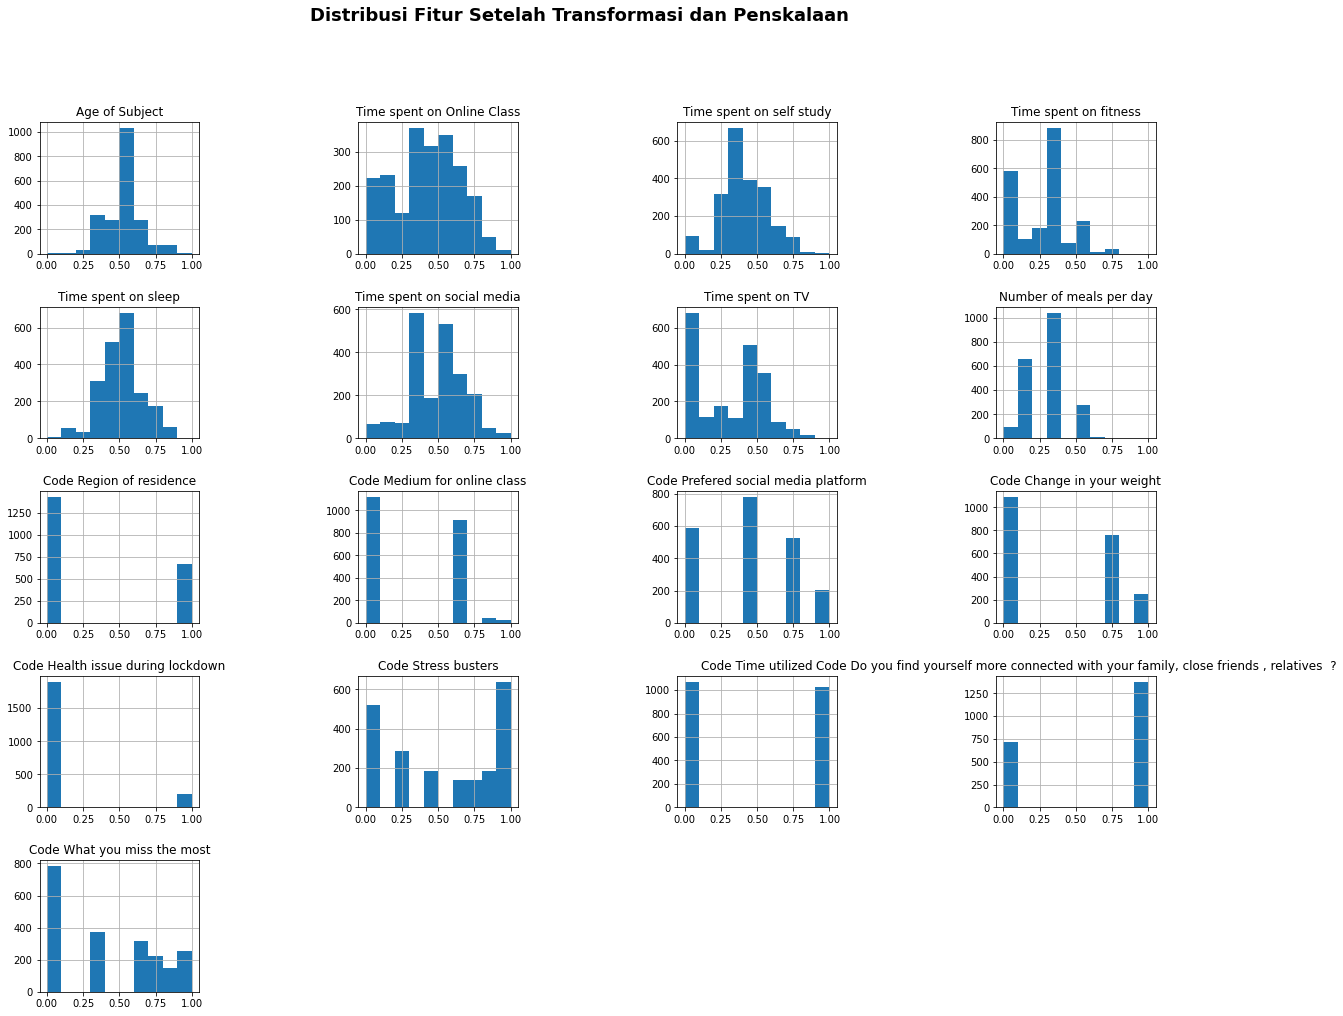

In [174]:
# Distribusi Fitur Setelah Transformasi dan Penskalaan

pd.DataFrame(X_scaled, columns=X.columns).hist(figsize=(20,16))

plt.subplots_adjust(wspace=1, hspace=0.4)
plt.suptitle('Distribusi Fitur Setelah Transformasi dan Penskalaan', fontweight='bold', fontsize=18)
plt.show()

In [175]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier,\
AdaBoostClassifier, GradientBoostingClassifier

# Seleksi Fitur menggunakan Random Forest

rf = RandomForestClassifier(
    n_estimators=100, max_depth=10, n_jobs=-1, 
    class_weight='balanced', random_state=2022)

rf.fit(X_scaled, y_smote)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_jobs=-1,
                       random_state=2022)

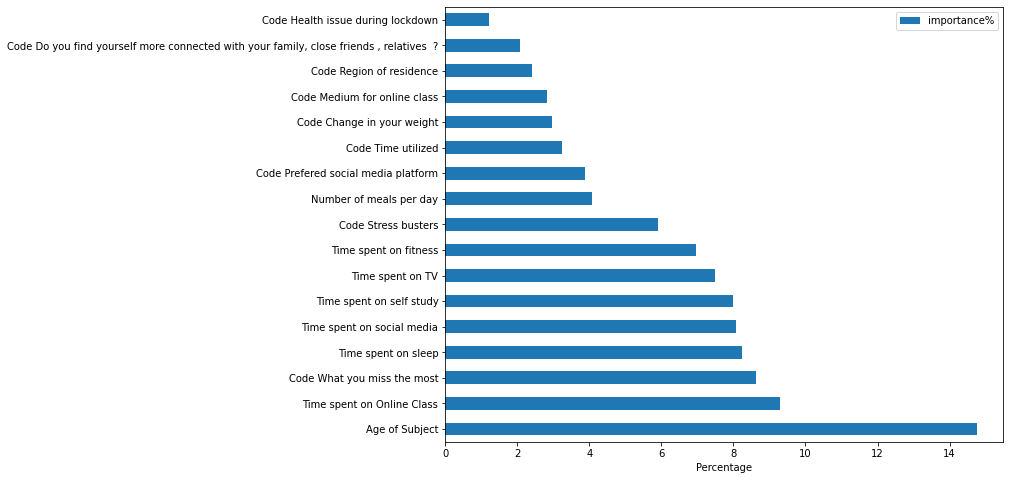

In [176]:
feature_imp = pd.DataFrame(
    np.round(rf.feature_importances_*100,2),
    index=X.columns, columns=['importance%'])

feature_imp = feature_imp.sort_values(
    by='importance%', ascending=False)

feature_imp.plot(kind='barh', figsize=(10,8))
plt.xlabel('Percentage')
plt.show()

In [177]:
# Memilih 3 fitur yang paling berpengaruh 
imp_features = feature_imp.index[:17]
imp_features

Index(['Age of Subject', 'Time spent on Online Class',
       'Code What you miss the most', 'Time spent on sleep',
       'Time spent on social media', 'Time spent on self study',
       'Time spent on TV', 'Time spent on fitness', 'Code Stress busters',
       'Number of meals per day', 'Code Prefered social media platform',
       'Code Time utilized', 'Code Change in your weight',
       'Code Medium for online class', 'Code Region of residence',
       'Code Do you find yourself more connected with your family, close friends , relatives  ?',
       'Code Health issue during lockdown'],
      dtype='object')

In [178]:
X_selected = pd.DataFrame(X_scaled, columns=X.columns)[imp_features]
X_selected

,Age of Subject,Time spent on Online Class,Code What you miss the most,Time spent on sleep,Time spent on social media,Time spent on self study,Time spent on TV,Time spent on fitness,Code Stress busters,Number of meals per day,Code Prefered social media platform,Code Time utilized,Code Change in your weight,Code Medium for online class,Code Region of residence,"Code Do you find yourself more connected with your family, close friends , relatives ?",Code Health issue during lockdown
0,0.583909,0.308929,0.000000,0.439286,0.624174,0.506888,0.401847,0.000000,1.000000,0.504622,1.000000,1.0,0.730518,0.000000,0.0,1.0,0.0
1,0.583909,0.000000,0.747231,0.708958,0.624174,0.000000,0.000000,0.593389,0.756086,0.356261,0.750537,1.0,1.000000,0.610341,0.0,0.0,0.0
2,0.561094,0.784640,0.607068,0.319675,0.505743,0.431212,0.000000,0.000000,0.000000,0.356261,1.000000,0.0,0.000000,0.000000,0.0,1.0,0.0
3,0.561094,0.423992,0.396822,0.319675,0.782128,0.336316,0.000000,0.367340,0.452106,0.356261,0.000000,0.0,1.000000,0.610341,0.0,0.0,0.0
4,0.583909,0.423992,0.607068,0.541532,0.624174,0.431212,0.401847,0.367340,1.000000,0.504622,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090,0.346773,0.490846,0.000000,0.583220,0.505743,0.391269,0.401847,0.367340,0.614305,0.191031,0.750537,1.0,0.730518,0.610341,0.0,0.0,0.0
2091,0.257514,0.174553,0.000000,0.630957,0.506543,0.335698,0.403207,0.365779,0.257655,0.356261,0.750537,1.0,0.730518,0.610341,0.0,1.0,0.0
2092,0.304425,0.490688,0.000000,0.708958,0.329322,0.415890,0.401847,0.558495,0.756086,0.504622,0.750537,1.0,0.000000,0.610341,0.0,1.0,0.0
2093,0.304425,0.374555,0.000000,0.786077,0.563515,0.284466,0.638263,0.000000,0.257655,0.000000,0.750537,0.0,0.730518,0.610341,0.0,0.0,0.0


In [179]:
# PEMODELAN DATA DAN HYPERPARAMETER

model_data = X_selected
model_data['target'] = y_smote
model_data


,Age of Subject,Time spent on Online Class,Code What you miss the most,Time spent on sleep,Time spent on social media,Time spent on self study,Time spent on TV,Time spent on fitness,Code Stress busters,Number of meals per day,Code Prefered social media platform,Code Time utilized,Code Change in your weight,Code Medium for online class,Code Region of residence,"Code Do you find yourself more connected with your family, close friends , relatives ?",Code Health issue during lockdown,target
0,0.583909,0.308929,0.000000,0.439286,0.624174,0.506888,0.401847,0.000000,1.000000,0.504622,1.000000,1.0,0.730518,0.000000,0.0,1.0,0.0,4
1,0.583909,0.000000,0.747231,0.708958,0.624174,0.000000,0.000000,0.593389,0.756086,0.356261,0.750537,1.0,1.000000,0.610341,0.0,0.0,0.0,5
2,0.561094,0.784640,0.607068,0.319675,0.505743,0.431212,0.000000,0.000000,0.000000,0.356261,1.000000,0.0,0.000000,0.000000,0.0,1.0,0.0,1
3,0.561094,0.423992,0.396822,0.319675,0.782128,0.336316,0.000000,0.367340,0.452106,0.356261,0.000000,0.0,1.000000,0.610341,0.0,0.0,0.0,1
4,0.583909,0.423992,0.607068,0.541532,0.624174,0.431212,0.401847,0.367340,1.000000,0.504622,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090,0.346773,0.490846,0.000000,0.583220,0.505743,0.391269,0.401847,0.367340,0.614305,0.191031,0.750537,1.0,0.730518,0.610341,0.0,0.0,0.0,5
2091,0.257514,0.174553,0.000000,0.630957,0.506543,0.335698,0.403207,0.365779,0.257655,0.356261,0.750537,1.0,0.730518,0.610341,0.0,1.0,0.0,5
2092,0.304425,0.490688,0.000000,0.708958,0.329322,0.415890,0.401847,0.558495,0.756086,0.504622,0.750537,1.0,0.000000,0.610341,0.0,1.0,0.0,5
2093,0.304425,0.374555,0.000000,0.786077,0.563515,0.284466,0.638263,0.000000,0.257655,0.000000,0.750537,0.0,0.730518,0.610341,0.0,0.0,0.0,5


In [180]:
import plotly.express as px
fig = px.scatter_3d(
    model_data, x='Age of Subject', 
    y='Time spent on Online Class',
    z='Code What you miss the most',
    color = 'target')

fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=0))

fig.show()


In [181]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(
    model_data.drop(['target'], axis=1),
    model_data['target'], test_size=0.20, 
    random_state=2022, stratify=model_data['target'])

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1676, 17)
(1676,)
(419, 17)
(419,)


In [182]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# K-Nearest Neighbor Classifier

knn_clf = KNeighborsClassifier(n_jobs=-1)

# Penyetelan Hiperparameter

knn_params = {
    'n_neighbors' : np.arange(2, 12)
}

knn_cv = GridSearchCV(knn_clf, knn_params, scoring='f1', n_jobs=-1, cv=10)
knn_cv.fit(X_train, y_train)


c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]



GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11])},
             scoring='f1')

In [183]:
knn_cv.best_params_ #Oleh karena itu, skor f1 tertinggi dicapai dengan knn menggunakan 2 tetangga

{'n_neighbors': 2}

In [184]:
# Prediksi pada data pelatihan menggunakan prediksi lintas Val
knn_train_pred = cross_val_predict(knn_cv, X_train, y_train, cv=10, n_jobs=-1)
knn_train_pred

array([1, 5, 3, ..., 4, 5, 2], dtype=int64)

In [185]:
from sklearn.metrics import classification_report, plot_roc_curve
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
# Laporan Klasifikasi data pelatihan

knn_report = classification_report(
    y_train, knn_train_pred, digits=4,
    target_names=['Very Poor', 'Poor', 'Average', 'Good', 'Excellent']
)

print(knn_report)

              precision    recall  f1-score   support

   Very Poor     0.3605    0.4746    0.4098       335
        Poor     0.6565    0.8955    0.7576       335
     Average     0.3411    0.2619    0.2963       336
        Good     0.5221    0.3881    0.4452       335
   Excellent     0.8192    0.6627    0.7327       335

    accuracy                         0.5364      1676
   macro avg     0.5399    0.5366    0.5283      1676
weighted avg     0.5398    0.5364    0.5282      1676



In [186]:
from sklearn.linear_model import LogisticRegression # linear classification
# REGRESI LOGISTIK

lr_clf = LogisticRegression(class_weight='balanced', random_state=2022, n_jobs=-1)

In [187]:
# Penyetelan hyper-parameter menggunakan Pencarian Grid 

lr_params = {
    'penalty': ['l2', 'elasticnet'],
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

lr_cv = GridSearchCV(lr_clf,lr_params, scoring='f1', cv=10, n_jobs=-1)
lr_cv.fit(X_train, y_train)

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


400 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\ACER\AppData\Local\Programs\Pytho

GridSearchCV(cv=10,
             estimator=LogisticRegression(class_weight='balanced', n_jobs=-1,
                                          random_state=2022),
             n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1')

In [188]:
# Nilai parameter terbaik untuk mencapai skor F1 tertinggi 
lr_cv.best_params_

{'C': 0.0001, 'penalty': 'l2', 'solver': 'newton-cg'}

In [189]:
# Prediksi pada data pelatihan menggunakan prediksi nilai silang
lr_train_pred = cross_val_predict(lr_cv, X_train, y_train, cv=10, n_jobs=-1)

# Laporan klasifikasi
lr_report = classification_report(
    y_train, lr_train_pred, digits=4,
    target_names=['Very Poor', 'Poor', 'Average', 'Good', 'Excellent']
)
print(lr_report)

              precision    recall  f1-score   support

   Very Poor     0.3734    0.3433    0.3577       335
        Poor     0.3996    0.5463    0.4615       335
     Average     0.3429    0.0357    0.0647       336
        Good     0.3268    0.2000    0.2481       335
   Excellent     0.4030    0.8060    0.5373       335

    accuracy                         0.3860      1676
   macro avg     0.3691    0.3862    0.3339      1676
weighted avg     0.3691    0.3860    0.3337      1676



In [190]:
from sklearn.svm import LinearSVC, SVC # support vector machines

# SUPPORT VECTOR MACHINE (SVM)
# Klasifikasi SVM Linear (Hard Margin)

lin_svm_clf = SVC(kernel='linear', class_weight='balanced', random_state=2022)
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]# deicison boundries
}

lin_svm_cv = GridSearchCV(lin_svm_clf, params, scoring='f1', n_jobs=-1, cv=10)
lin_svm_cv.fit(X_train, y_train)

lin_svm_cv.best_params_

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan]



{'C': 0.001}

In [191]:
lin_svm_train_pred = cross_val_predict(
    lin_svm_cv, X_train, y_train, cv=10, n_jobs=-1
)

svm_report = classification_report(
    y_train, lin_svm_train_pred, digits=4,
    target_names=['Very Poor', 'Poor', 'Average', 'Good', 'Excellent']
)

print(svm_report)

              precision    recall  f1-score   support

   Very Poor     0.3051    0.2478    0.2735       335
        Poor     0.3799    0.3164    0.3453       335
     Average     0.2593    0.1458    0.1867       336
        Good     0.2529    0.3910    0.3072       335
   Excellent     0.3421    0.4269    0.3798       335

    accuracy                         0.3055      1676
   macro avg     0.3079    0.3056    0.2985      1676
weighted avg     0.3078    0.3055    0.2984      1676



In [192]:
# Klasifikasi SVM Non-Linear (Soft Margin)
rbf_svm = SVC(kernel='rbf', class_weight='balanced')
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], # deicison boundries
}
rbf_svm_cv = GridSearchCV(rbf_svm, params, scoring='f1', n_jobs=-1, cv=10)
rbf_svm_cv.fit(X_train, y_train)

rbf_svm_cv.best_params_

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan]



{'C': 0.001}

In [193]:
rbf_svm_train_pred = cross_val_predict(
    rbf_svm_cv, X_train, y_train, cv=10, n_jobs=-1
)
rbf_report = classification_report(
    y_train, rbf_svm_train_pred, digits=4,
    target_names=['Very Poor', 'Poor', 'Average', 'Good', 'Excellent']
)
print(rbf_report)

              precision    recall  f1-score   support

   Very Poor     0.2698    0.3552    0.3067       335
        Poor     0.3987    0.3642    0.3807       335
     Average     0.2779    0.2738    0.2759       336
        Good     0.2743    0.2866    0.2803       335
   Excellent     0.4718    0.3493    0.4014       335

    accuracy                         0.3258      1676
   macro avg     0.3385    0.3258    0.3290      1676
weighted avg     0.3385    0.3258    0.3289      1676



In [194]:
from sklearn.tree import DecisionTreeClassifier # tree based
# POHON KEPUTUSAN (DECISION TREE)

dt_clf = DecisionTreeClassifier(class_weight='balanced', random_state=2022)

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(2, 22, 2), # depth of tree
    'min_samples_split': [2,3,4], # min. no. of samples a node must have before it splits
    'min_samples_leaf': [1, 2, 3, 4]  # min. non of samples a leaf node must have
}
dt_cv = GridSearchCV(dt_clf, params, scoring='f1', n_jobs=-1, cv=10)
dt_cv.fit(X_train, y_train)

dt_cv.best_params_


c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [195]:
dt_train_pred = cross_val_predict(dt_cv, X_train, y_train, cv=10, n_jobs=-1)

best_dt_clf = DecisionTreeClassifier(
    class_weight='balanced', random_state=2022,
    criterion='gini', max_depth=2, min_samples_leaf=1,
    min_samples_split=2
)
best_dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, random_state=2022)

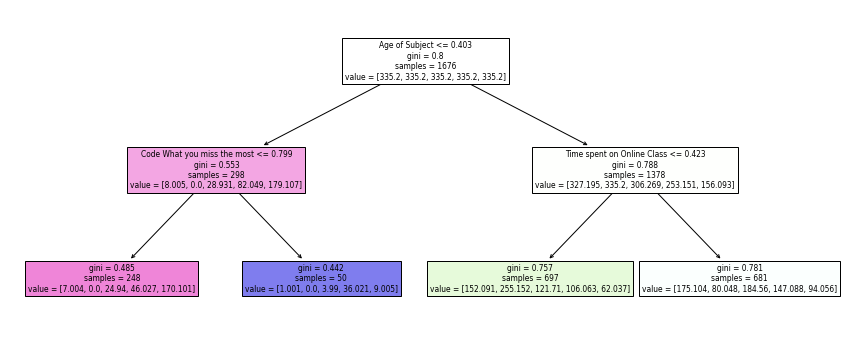

In [196]:
from sklearn.tree import plot_tree # decision tree 

plt.figure(figsize=(15,6))
plot_tree(
    best_dt_clf, filled=True,
    feature_names=['Age of Subject', 'Time spent on Online Class', 'Code What you miss the most']
)
plt.show()


In [197]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
# RANDOM FOREST

rf = RandomForestClassifier(n_jobs=-1, random_state=2022, class_weight='balanced')

params = {
    #'n_estimators': [100, 200, 300],
    'max_depth': np.arange(2, 22, 1),
    #'min_samples_split': [2, 3, 4],
    #'min_samples_leaf': [1, 2, 3, 4],
    'criterion': ['gini', 'entropy']
}
rf_cv = RandomizedSearchCV(
    rf, params, scoring='f1', n_jobs=-1, cv=10,
    random_state=2022, n_iter=20
)
rf_cv.fit(X_train, y_train)

rf_cv.best_params_rf_train_pred = cross_val_predict(
    rf_cv, X_train, y_train, cv=10, n_jobs=-1, verbose=1
)


c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 13.7min finished


In [198]:
rf_train_pred = cross_val_predict(
    rf_cv, X_train, y_train, cv=10, n_jobs=-1, verbose=1
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 15.0min finished


In [199]:
rf_report = classification_report(
    y_train, rf_train_pred, digits=4,
    target_names=['Very Poor', 'Poor', 'Average', 'Good', 'Excellent']
)

print(rf_report)

              precision    recall  f1-score   support

   Very Poor     0.5272    0.6358    0.5765       335
        Poor     0.7685    0.9612    0.8541       335
     Average     0.4916    0.3482    0.4077       336
        Good     0.6692    0.5254    0.5886       335
   Excellent     0.7557    0.7940    0.7744       335

    accuracy                         0.6527      1676
   macro avg     0.6424    0.6529    0.6402      1676
weighted avg     0.6424    0.6527    0.6401      1676



In [200]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score

# EVALUASI MODEL

models = [
    'kNN', 'Logistic Regression', 'Linear SVM', 
    'Non-Linear SVM', 'Decision Tree', 'Random Forest']

model_colors = sns.color_palette("Dark2")
accuracy = []
recall = []
precision = []
f1 = []
predictions = [
    knn_train_pred, lr_train_pred, lin_svm_train_pred,
    rbf_svm_train_pred, dt_train_pred, rf_train_pred
]

for model_pred in predictions:
    accuracy.append(accuracy_score(y_train, model_pred))
    precision.append(precision_score(y_train, model_pred, pos_label='positive', average='micro'))
    recall.append(recall_score(y_train, model_pred, pos_label='positive', average='micro'))
    f1.append(f1_score(y_train, model_pred, pos_label='positive', average='micro'))



c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning:

Note that pos_l

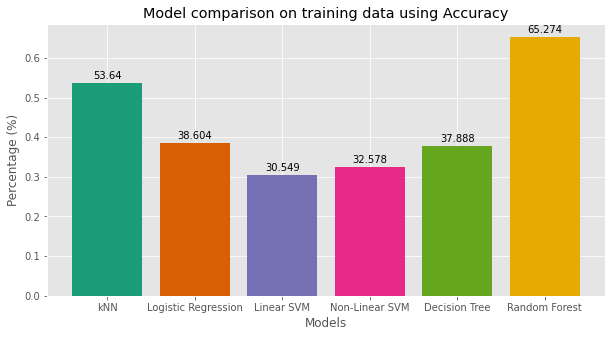

In [201]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(10, 5))
    plt.bar(models, accuracy, color=model_colors)
    for m, a in zip(models, accuracy):
        plt.text(m, a+0.01, f'{round(a*100, 3)}', ha='center')

    plt.xlabel('Models')
    plt.ylabel('Percentage (%)')
    plt.title('Model comparison on training data using Accuracy')

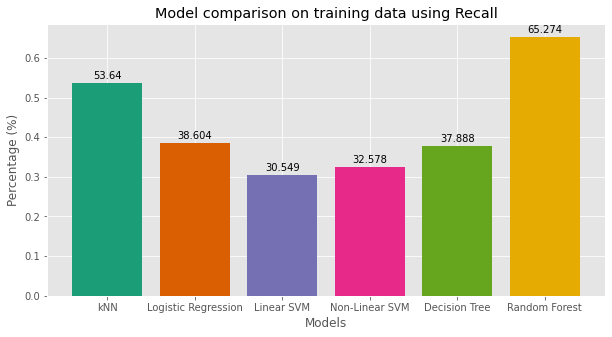

In [202]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(10, 5))
    plt.bar(models, recall, color=model_colors)
    for m, a in zip(models, recall):
        plt.text(m, a+0.01, f'{round(a*100, 3)}', ha='center')

    plt.xlabel('Models')
    plt.ylabel('Percentage (%)')
    plt.title('Model comparison on training data using Recall')

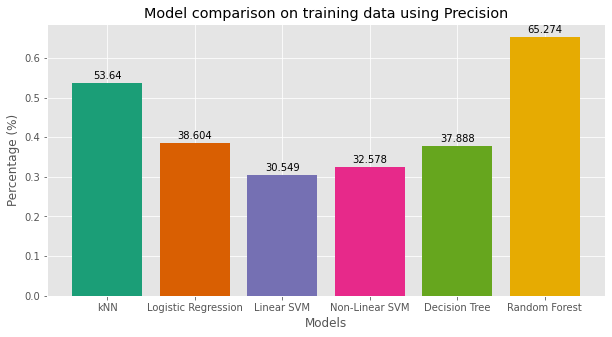

In [203]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(10, 5))
    plt.bar(models, precision, color=model_colors)
    for m, a in zip(models, precision):
        plt.text(m, a+0.01, f'{round(a*100, 3)}', ha='center')

    plt.xlabel('Models')
    plt.ylabel('Percentage (%)')
    plt.title('Model comparison on training data using Precision')

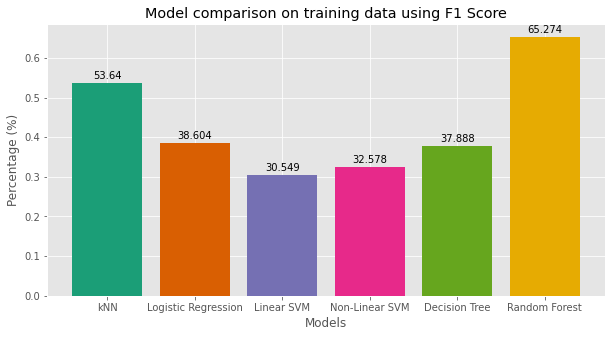

In [204]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(10, 5))
    plt.bar(models, f1, color=model_colors)
    for m, a in zip(models, f1):
        plt.text(m, a+0.01, f'{round(a*100, 3)}', ha='center')

    plt.xlabel('Models')
    plt.ylabel('Percentage (%)')
    plt.title('Model comparison on training data using F1 Score')

In [223]:
# PREDIKSI PADA DATA UJI

best_models = [
    knn_cv, lr_cv, lin_svm_cv, rbf_svm_cv, dt_cv, rf_cv
]

for name, model in zip(models, best_models):
    best_predictions = model.predict(X_test)
    print(name.upper())
    print(classification_report(y_test, best_predictions))
    print('-----------------------------------------------------------------------')

KNN
              precision    recall  f1-score   support

           1       0.42      0.61      0.50        84
           2       0.64      0.83      0.72        84
           3       0.29      0.22      0.25        83
           4       0.57      0.42      0.48        84
           5       0.86      0.64      0.73        84

    accuracy                           0.54       419
   macro avg       0.55      0.54      0.54       419
weighted avg       0.55      0.54      0.54       419

-----------------------------------------------------------------------
LOGISTIC REGRESSION
              precision    recall  f1-score   support

           1       0.37      0.35      0.36        84
           2       0.40      0.54      0.46        84
           3       0.50      0.04      0.07        83
           4       0.36      0.21      0.27        84
           5       0.38      0.77      0.51        84

    accuracy                           0.38       419
   macro avg       0.40      0.38  

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



NON-LINEAR SVM
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        84
           2       0.00      0.00      0.00        84
           3       0.20      1.00      0.33        83
           4       0.00      0.00      0.00        84
           5       0.00      0.00      0.00        84

    accuracy                           0.20       419
   macro avg       0.04      0.20      0.07       419
weighted avg       0.04      0.20      0.07       419

-----------------------------------------------------------------------
DECISION TREE
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        84
           2       0.35      0.73      0.47        84
           3       0.26      0.58      0.36        83
           4       0.50      0.06      0.11        84
           5       0.75      0.46      0.57        84

    accuracy                           0.37       419
   macro avg       0.37      0

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetri

RANDOM FOREST
              precision    recall  f1-score   support

           1       0.54      0.63      0.58        84
           2       0.75      1.00      0.86        84
           3       0.33      0.25      0.29        83
           4       0.73      0.54      0.62        84
           5       0.81      0.80      0.80        84

    accuracy                           0.64       419
   macro avg       0.63      0.64      0.63       419
weighted avg       0.63      0.64      0.63       419

-----------------------------------------------------------------------
